In [8]:
import pandas as pd
pd.set_option("max_rows", None)
import matplotlib.pyplot as plt
from dateutil.parser import parse
import re
import seaborn as sns

In [10]:
data = pd.read_csv('/Users/yuxiding/Desktop/data_hall_raw.csv') #use your path
data['Display Time'] = data['Display Time'].apply(lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data['time_gap'] = data['Display Time']- data['Display Time'].shift(1)
meta = pd.read_csv('/Users/yuxiding/Desktop/Hall_meta.csv')
data_description = pd.DataFrame()

In [4]:
for subjectId, df in data.groupby('subjectId'):
    
    df['time_gap'].iloc[0] = pd.NaT
    
    subj_id = str(subjectId)
    temp = meta[meta["ID"]==subjectId]
    status = str(temp["status"].values[0])
    l_of_r = df['GlucoseValue'].count()
    maxGV = str(df['GlucoseValue'].max())
    minGV = str(df['GlucoseValue'].min())
    meanGV = round(df['GlucoseValue'].mean(),3)
    
    totalGapSize = df[df["time_gap"]>str("00:05:10")]
    miss_val = round((totalGapSize['time_gap'].sum()).total_seconds() / (60.0*5))
    
    days = df['Display Time'].iloc[-1]-df['Display Time'].iloc[1]
    start_time = str(df['Display Time'].iloc[0])
    end_time = str(df['Display Time'].iloc[-1])
    
    totalEntry = days.total_seconds() / (60.0*5)
    P_miss_val = round(100* miss_val/totalEntry,2)
    
    df_gap = df[df["time_gap"]>str("00:05:10")]
    ave_gap_size = miss_val / df_gap.shape[0]
    
    temp_df = pd.DataFrame({'Subject ID':[subj_id], 'Status':[status], 'Length of readings':[l_of_r], 'Max. Glucose Value':[maxGV], 'Mean Glucose Value':[meanGV], 'Missing Values':[miss_val], 'Percent of missing values':[P_miss_val], 'Average gap size':[ave_gap_size], 'Days':[days],'Start':[start_time],'End':[end_time]})
    data_description = pd.concat([temp_df,data_description],ignore_index=True)

display(data_description)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Subject ID,Status,Length of readings,Max. Glucose Value,Mean Glucose Value,Missing Values,Percent of missing values,Average gap size,Days,Start,End
0,2133-041,non-diabetic,1858,204,108.560,490,21.04,28.823529,8 days 02:04:26,2017-07-03 18:32:06,2017-07-11 20:41:32
1,2133-040,non-diabetic,1792,171,92.585,100,5.39,2.941176,6 days 10:39:37,2017-06-28 13:34:52,2017-07-05 00:19:29
2,2133-039,diabetic,2013,204,103.922,729,27.93,5.607692,9 days 01:29:20,2017-06-05 12:23:22,2017-06-14 13:57:42
3,2133-037,non-diabetic,1785,153,92.966,55,3.02,2.894737,6 days 07:34:25,2017-06-05 14:11:14,2017-06-11 21:50:39
4,2133-036,pre-diabetic,1954,214,107.529,651,26.21,5.470588,8 days 14:59:26,2017-06-01 15:26:53,2017-06-10 06:31:19
5,2133-035,pre-diabetic,1830,190,101.771,314,15.06,5.508772,7 days 05:44:42,2017-06-01 17:17:00,2017-06-08 23:06:42
6,2133-033,non-diabetic,1892,161,92.981,236,11.24,9.076923,7 days 06:59:31,2017-05-19 12:58:22,2017-05-26 20:02:53
7,2133-032,non-diabetic,1781,147,99.475,6,0.34,2.000000,6 days 04:29:25,2017-05-19 13:31:19,2017-05-25 18:05:44
8,2133-030,non-diabetic,1818,147,93.200,143,7.33,20.428571,6 days 18:39:36,2017-05-03 14:13:09,2017-05-10 08:57:45
9,2133-028,non-diabetic,1850,111,74.790,195,9.56,65.000000,7 days 01:59:30,2017-05-10 00:03:32,2017-05-17 02:08:02


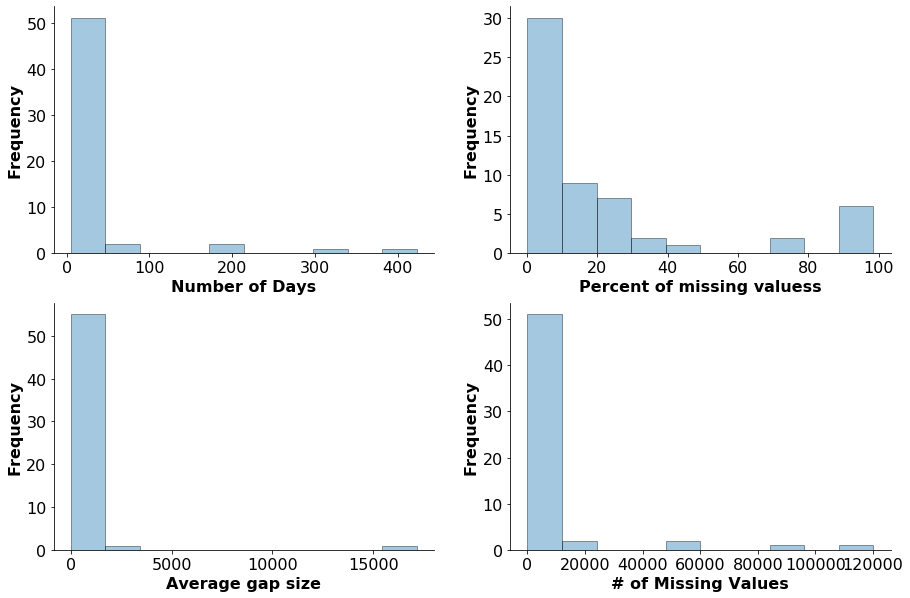

In [5]:
days = []
for i in data_description['Days']:
    days.append(i.days)

import matplotlib.ticker as ticker


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(days, kde = False, ax=axes[0,0], hist_kws=dict(edgecolor="k", linewidth=1), bins=10)
fig.axes[0].set_xlabel('Number of Days', weight='bold', fontsize=16)
fig.axes[0].set_ylabel('Frequency', weight='bold', fontsize=16)
fig.axes[0].tick_params(axis="both", labelsize=16)

sns.distplot(data_description['Percent of missing values'],kde = False, ax=axes[0,1], hist_kws=dict(edgecolor="k", linewidth=1))
fig.axes[1].set_xlabel('Percent of missing valuess', weight='bold', fontsize=16)
fig.axes[1].set_ylabel('Frequency', weight='bold', fontsize=16)
fig.axes[1].tick_params(axis="both", labelsize=16)

sns.distplot(data_description['Average gap size'], kde = False,  ax=axes[1,0], hist_kws=dict(edgecolor="k", linewidth=1), bins=10)
fig.axes[2].set_xlabel('Average gap size', weight='bold', fontsize=16)
fig.axes[2].set_ylabel('Frequency', weight='bold', fontsize=16)
fig.axes[2].tick_params(axis="both", labelsize=16)

sns.distplot(data_description['Missing Values'],kde = False, ax=axes[1,1], hist_kws=dict(edgecolor="k", linewidth=1), bins=10)
fig.axes[3].set_xlabel('# of Missing Values', weight='bold', fontsize=16)
fig.axes[3].set_ylabel('Frequency', weight='bold', fontsize=16)
fig.axes[3].tick_params(axis="both", labelsize=16)

sns.despine()

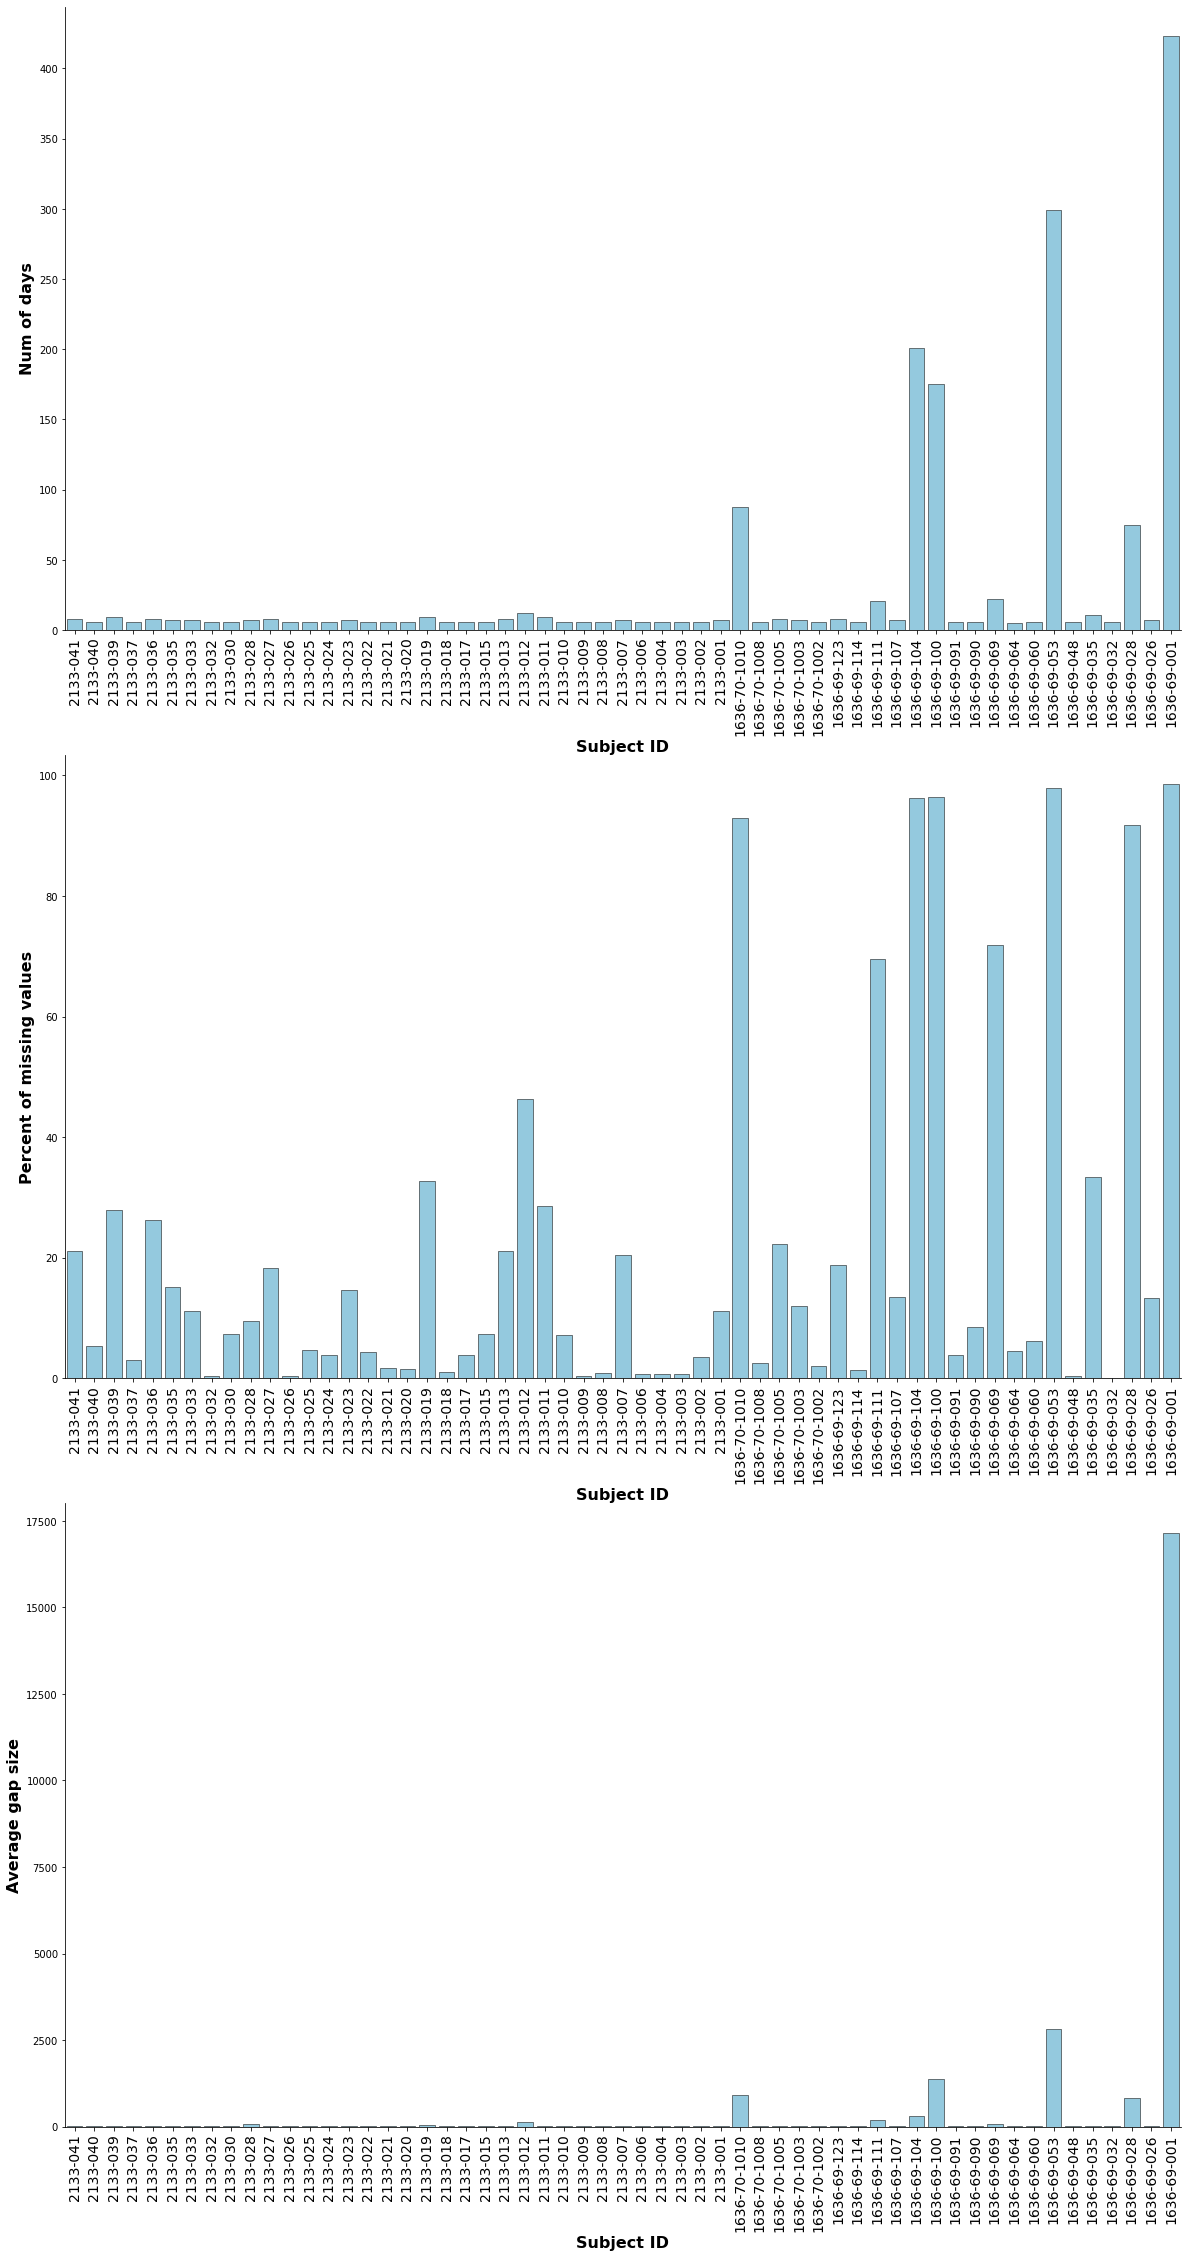

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(20, 39))
chart = sns.barplot(ax=axes[0], x = data_description['Subject ID'], y = days, color = 'skyblue', edgecolor="k", linewidth=0.5)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontsize = 14);
plt.rc('ytick', labelsize=15)  
fig.axes[0].set_xlabel('Subject ID', weight='bold', fontsize = 16)
fig.axes[0].set_ylabel('Num of days', weight='bold', fontsize = 16)

chart = sns.barplot(ax=axes[1], x = data_description['Subject ID'], y = data_description['Percent of missing values'], color = 'skyblue', edgecolor="k", linewidth=0.5)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontsize = 14);
fig.axes[1].set_xlabel('Subject ID', weight='bold', fontsize = 16)
fig.axes[1].set_ylabel('Percent of missing values', weight='bold', fontsize = 16)

chart = sns.barplot(ax=axes[2], x = data_description['Subject ID'], y = data_description['Average gap size'], color = 'skyblue', edgecolor="k", linewidth=0.5)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontsize = 14);
fig.axes[2].set_xlabel('Subject ID', weight='bold', fontsize = 16)
fig.axes[2].set_ylabel('Average gap size', weight='bold', fontsize = 16)

sns.despine()